In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA on Uber Case Study

In [3]:
df = pd.read_csv("/content/drive/MyDrive/JOBAAJ Projects/Module 5_EDA/1) Uber Case Study/dataset_csv.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [4]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [5]:
df.tail()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3
335,24-Sep-12,6,9,1,2,2,7


In [6]:
df.shape

(336, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [8]:
df.describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


In [9]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

## Data Processing

In [10]:
# renaming field names and removing whitespaces

column_names = {'Time (Local)':'Hour', 'Eyeballs ':'Eyeballs', 'Zeroes ':'Zeroes', 'Completed Trips ':'Completed Trips',
       'Requests ':'Requests'}
df.rename(columns = column_names, inplace = True)
df.columns

Index(['Date', 'Hour', 'Eyeballs', 'Zeroes', 'Completed Trips', 'Requests',
       'Unique Drivers'],
      dtype='object')

In [11]:
# Checking dataframe with new field names
df.head(3)

,Date,Hour,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14


In [12]:
# Changing data type of Date field
df['Date']= pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


<ipython-input-12-491c945c9a4b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


**Count of app opening (Eyeballs) per day by the Customers**

In [13]:
daily_eyeballs = df.groupby('Date')['Eyeballs'].sum()
print("App opened per day: ")
daily_eyeballs

App opened per day: 


Date
2012-09-10    189
2012-09-11    314
2012-09-12    423
2012-09-13    325
2012-09-14    549
2012-09-15    788
2012-09-16    426
2012-09-17    377
2012-09-18    342
2012-09-19    319
2012-09-20    375
2012-09-21    740
2012-09-22    960
2012-09-23    526
2012-09-24     34
Name: Eyeballs, dtype: int64

**Count of Zeroes: No. of Customers who opened the app but didn't find the car.**

In [14]:
count_zeroes = df.groupby('Date')['Zeroes'].sum()
print('Customers found no car per day:')
count_zeroes

Customers found no car per day:


Date
2012-09-10     26
2012-09-11     64
2012-09-12     55
2012-09-13     80
2012-09-14     92
2012-09-15    258
2012-09-16     93
2012-09-17     76
2012-09-18     94
2012-09-19     46
2012-09-20     68
2012-09-21    124
2012-09-22    219
2012-09-23    115
2012-09-24     19
Name: Zeroes, dtype: int64

## Case Study Analysis

### 1. Which date had the most completed trips during the two weeks?

In [15]:
# calculate no. of trips completed per day
trips_per_day = df.groupby('Date')['Completed Trips'].sum()

# max trip completed in a day
max_trips = trips_per_day.max()

# date of completing max no. of trip
date_max_trips = trips_per_day.idxmax()
print(f'{date_max_trips.date()} with {max_trips} trips has the maximum no. of trips in the 2 weeks period.')

2012-09-22 with 248 trips has the maximum no. of trips in the 2 weeks period.


**2012-09-22 with 248 trips has the maximum no. of trips in the 2 weeks period.**

### 2. What was the highest number of completed trips within a 24-hour period?

In [16]:
# Sorting dataframe as per date
df_date = df.sort_values(by = 'Date')

#trip completed in 24 hrs
completed_trips_24hr = df_date.rolling('24H', on = 'Date')['Completed Trips'].sum()
max_rolling_trips_24h = completed_trips_24hr.max()

print(f'The max. no. of trips completed in 24hr period was {max_rolling_trips_24h}.')

The max. no. of trips completed in 24hr period was 248.0.


**The max. no. of trips completed in 24hr period was 248.0.**

### 3. Which hour of the day had the most requests during the two-week period?

In [17]:
requests_per_hour = df.groupby('Hour')['Requests'].sum()

# Finding max requests
max_requests = requests_per_hour.idxmax()
hr_max_requests = max_requests.max()
print(f'The maximum requests are palced at {hr_max_requests}.')

The maximum requests are palced at 23.


**The maximum requests are placed at 23 hr.**

### 4.	What percentages of all zeroes during the two week period occurred on weekends (Friday at 5 pm to Sunday at 3 am)? (Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm))

In [18]:
# Extract weekend data where 0 to 6 is Mon to Sun
weekend_data = df[((df['Date'].dt.dayofweek == 4) & (df['Hour'] >= 17)) |
                   (df['Date'].dt.dayofweek == 5) |
                   ((df['Date'].dt.dayofweek == 6) & (df['Hour'] < 3))]
weekend_data

,Date,Hour,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
106,2012-09-14,17,34,4,3,5,13
107,2012-09-14,18,40,2,8,9,14
108,2012-09-14,19,46,6,9,10,15
109,2012-09-14,20,38,4,8,9,14
110,2012-09-14,21,49,6,8,9,17
...,...,...,...,...,...,...,...
303,2012-09-22,22,77,11,25,33,19
304,2012-09-22,23,99,59,25,44,17
305,2012-09-23,0,62,25,23,32,18
306,2012-09-23,1,38,1,15,23,18


In [35]:
# count total zeroes in the weekend
total_zeroes = df['Zeroes'].sum()

# Count of zeroes in weekend data
weekend_zeroes = weekend_data['Zeroes'].sum()

# calculating the %
percentage_weekend_zeroes = (weekend_zeroes/total_zeroes)*100

print(f'The percentage of zeroes during the weekend {percentage_weekend_zeroes:.2f}')

The percentage of zeroes during the weekend 44.86


**The percentage of Zeroes is 44.9% weher the customers open the app but could not find the app.**

### 5.	What is the weighted average ratio of completed trips per driver during the two week period? (Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in the whole period.)

In [20]:
# each hour completed trips
hourly_trips = df.groupby('Hour')['Completed Trips'].sum().reset_index()

# each hour unique drivers
hourly_unique_drivers = df.groupby('Hour')['Unique Drivers'].sum().reset_index()

# ratio of completed trips to unique drivers each  hour
hourly_ratio_trips_drivers = hourly_trips['Completed Trips']/hourly_unique_drivers['Unique Drivers']

# weighted completed trips multiply hourly completed trips with hourly ratio of trips_drivers
weighted_completed_trips = (hourly_ratio_trips_drivers * (df.groupby('Hour')['Completed Trips'].sum()))

# add all the values of weighted completed trips
total_weighted_completed_trips = weighted_completed_trips.sum()

# sum the number of completed trips
total_completed_trips = df['Completed Trips'].sum()

#divide total weighted completed trips by total completed trips
weighted_avg_trips_driver = total_weighted_completed_trips/total_completed_trips

print(f'The weighted average ratio of completed trips per driver during the 2 weeks period is {weighted_avg_trips_driver:.2f}')

The weighted average ratio of completed trips per driver during the 2 weeks period is 0.63


### 6. In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.

In [21]:
import pandas as pd

hourly_unique_requests = df.groupby('Hour')['Requests'].nunique()

busiest_8hrs_start = hourly_unique_requests.rolling(window=8).sum().idxmax()

# Convert the index to a Pandas Timestamp
busiest_8hrs_start_timestamp = pd.Timestamp(busiest_8hrs_start, unit='h')

# Extract the hour component
busiest_8hrs_start_hour = busiest_8hrs_start_timestamp.hour

# Calculate the end time by adding 8 hours
busiest_8hrs_end_hour = (busiest_8hrs_start_hour + 8) % 24  # Ensure it's within 24-hour format

print(f'The busiest 8 hrs period starts at {busiest_8hrs_start_hour:02d}:00 and ends at {busiest_8hrs_end_hour:02d}:00.')


The busiest 8 hrs period starts at 22:00 and ends at 06:00.


**The busiest 8 hrs period starts at 22:00 and ends at 06:00.**

### 7.	True or False: Driver supply always increases when demand increases during the two week period. (Tip: Visualise the data to confirm your answer if needed.)

In [22]:
demand_supply = df.groupby('Date').agg({'Requests':'sum', 'Unique Drivers':'sum'})
demand_supply = demand_supply.reset_index()
demand_supply

,Date,Requests,Unique Drivers
0,2012-09-10,34,138
1,2012-09-11,52,132
2,2012-09-12,114,201
3,2012-09-13,67,159
4,2012-09-14,137,211
5,2012-09-15,282,193
6,2012-09-16,118,150
7,2012-09-17,78,164
8,2012-09-18,81,134
9,2012-09-19,54,186


In [23]:
# check whether driver supply increases with increase in request demand
# it checks if the difference between consective elements and if not greater than 0 return false
increase_supply = (demand_supply['Unique Drivers'].diff()>0) & (demand_supply['Requests'].diff()>0)

# all() function checks if the supply of drivers increase in each of demand of requests increase
supply_increase_with_demand = increase_supply.all()

print(supply_increase_with_demand)
print("The demand for driver supply does not increase with demand.")

False
The demand for driver supply does not increase with demand.


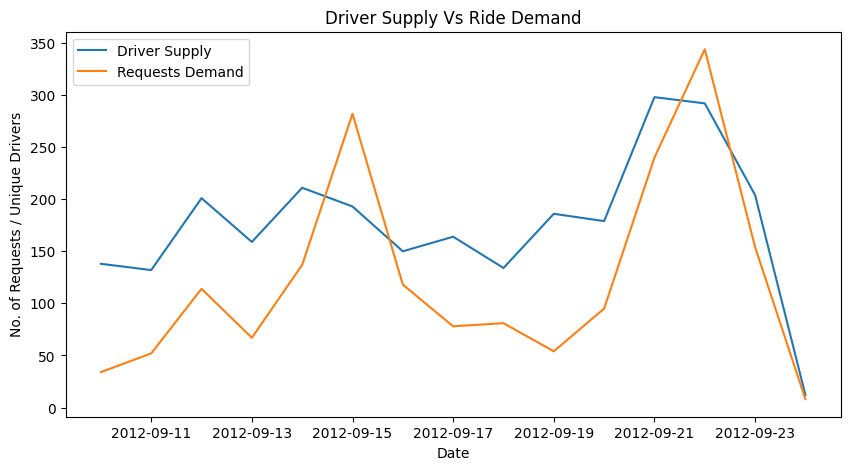

In [24]:
import matplotlib.pyplot as plt
# plot driver supply on each day
plt.figure(figsize = (10,5))
plt.plot(demand_supply['Date'], demand_supply['Unique Drivers'], label = 'Driver Supply')

# plot requests demand for each day
plt.plot(demand_supply['Date'], demand_supply['Requests'], label = 'Requests Demand')
plt.xlabel('Date')
plt.ylabel('No. of Requests / Unique Drivers')
plt.legend()
plt.title('Driver Supply Vs Ride Demand')
plt.show()

**Data Interpretation:** From the above line chart we can conclude that the driver supply does not increase with the demand even during the peak hours. This can occur due to severaol reasons like:

1) Traffic, weather conditionsor or events in city

2) Drivers might also choose not to work during the peak hours

We can analyse more to identify the reasons behing the demand supply and the driver supply.


### 8.	In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [25]:
df['72 Hour Period'] = pd.to_datetime(df['Date']).dt.floor('72H')

# Group the data by '72 Hour Period' and calculate the mean ratio of Zeroes to Eyeballs for each period
period_ratios = df.groupby('72 Hour Period').apply(lambda x: (x['Zeroes'] / x['Eyeballs']).mean())

# Find the period with the highest ratio
period_with_highest_ratio = period_ratios.idxmax().date()
highest_ratio = period_ratios.max()

print(f'The 72-hour period with the highest Zeroes to Eyeballs ratio is on {period_with_highest_ratio} with a ratio of {highest_ratio:.2f}')


The 72-hour period with the highest Zeroes to Eyeballs ratio is on 2012-09-23 with a ratio of 0.35


### 9.	If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? (Hint: Consider both rider eyeballs and driver supply when choosing)

In [26]:
# Calculate the ratio of completed trips to unique drivers for each hour
df['Trips per Driver Ratio'] = df['Completed Trips'] / df['Unique Drivers']

# Find the hour with the highest ratio, indicating high demand relative to driver supply
hour_to_add_drivers = df.groupby('Hour')['Trips per Driver Ratio'].mean().idxmax()

print(f'Add 5 drivers to the hour {hour_to_add_drivers} AM to maximize efficiency.')

Add 5 drivers to the hour 2 AM to maximize efficiency.


### 10.	True or False: There is exactly two weeks of data in this analysis

In [27]:
# Calculate difference between the max and min dates
date_diff = df['Date'].max() - df['Date'].min()

 # checking whether the difference is of 14 days or not.
is_date_diff_two_weeks = date_diff.days == 14

print(f'{is_date_diff_two_weeks}, the data is of 2 weeks time.')

True, the data is of 2 weeks time.


### 11.	Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) (Tip: Visualise the data to confirm your answer if needed.)

In [34]:
# avg no.of completed trips and unique drivers for each hour
avg_hourly_completed_trips = df.groupby('Hour')['Completed Trips'].mean()
avg_hourly_unique_drivers = df.groupby('Hour')['Unique Drivers'].mean()

#hour with lowest avg completed trips and unique drivers
hour_lowest_demand_supply = (avg_hourly_completed_trips + avg_hourly_unique_drivers).idxmin()
lowest_demand_supply_value = (avg_hourly_completed_trips + avg_hourly_unique_drivers).min()

print(f'We can consider {hour_lowest_demand_supply} AM as the end day where demand and supply both are at their minimum value of: {lowest_demand_supply_value:.2f}')

We can consider 4 AM as the end day where demand and supply both are at their minimum value of: 0.79


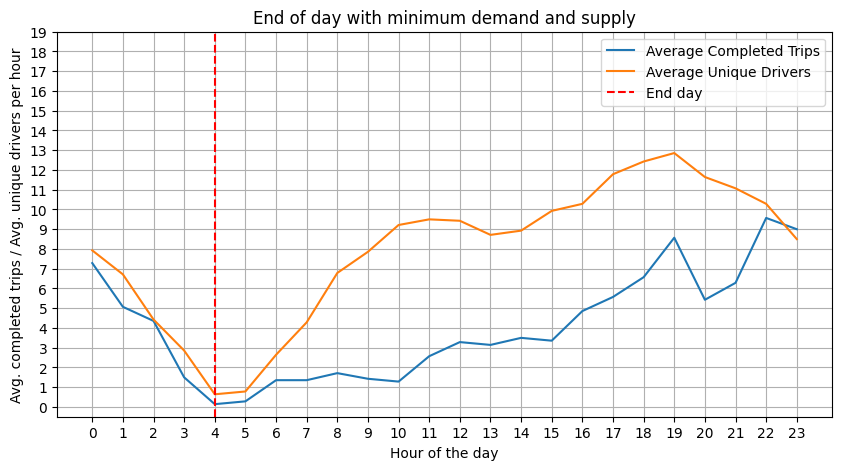

In [42]:
# plot a graph of avg hourly completed trips and unique drivers
plt.figure(figsize = (10,5))
plt.plot(avg_hourly_completed_trips, label = 'Average Completed Trips')
plt.plot(avg_hourly_unique_drivers, label = 'Average Unique Drivers')

plt.axvline(x=hour_lowest_demand_supply, color ='red', linestyle = '--', label = 'End day')
plt.xlabel('Hour of the day')
plt.ylabel('Avg. completed trips / Avg. unique drivers per hour')
plt.title('End of day with minimum demand and supply')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.yticks(range(20))
plt.show()